<a href="https://colab.research.google.com/github/hemhemoh/Generation-Classification/blob/main/GENERATION_CLASSIFICATION%20using%20inceptionnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from pathlib import Path
import zipfile
import random
import shutil
import tensorflow as tf
from shutil import copyfile
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow.keras.applications import resnet50
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras import layers, models, Model, optimizers, Sequential
from tensorflow.keras.layers import Dropout, Dense, Input, GlobalAveragePooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, BatchNormalization, Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.applications import InceptionV3

In [ ]:
#!unzip /content/drive/MyDrive/Generations.zip -d /content/drive/MyDrive 

In [ ]:
path = Path('/content/drive/MyDrive/Generations')
file_path = list(path.glob(r'**/*.jpeg'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [ ]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)

df = pd.concat([file_path, labels], axis=1)

df.columns = ['image', 'label']

df.head()

,image,label
0,/content/drive/MyDrive/Generations/Millenials/...,Millenials
1,/content/drive/MyDrive/Generations/Millenials/...,Millenials
2,/content/drive/MyDrive/Generations/Millenials/...,Millenials
3,/content/drive/MyDrive/Generations/Millenials/...,Millenials
4,/content/drive/MyDrive/Generations/Millenials/...,Millenials


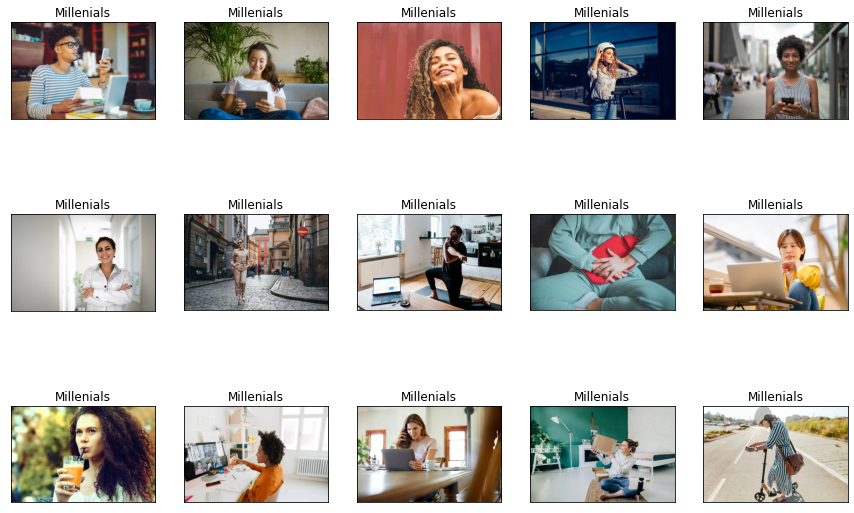

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10), subplot_kw={'xticks': [], 'yticks': []})

for ax in axes.flat:
    y = np.random.randint(1000)
    ax.imshow(plt.imread(df.image[y]))
    ax.set_title(df.label[y])
    
plt.show()

In [ ]:
df.label.value_counts()

Gen_Z           5577
Millenials      5040
babyboomerss    4818
Gen_x           3251
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test = train_test_split(df, test_size=.25, random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [ ]:
print('Shape of Train data is ', x_train.shape)
print('Shape of Test data is ', x_test.shape)
print('Shape of Validation data is ', x_val.shape)

Shape of Train data is  (11211, 2)
Shape of Test data is  (4672, 2)
Shape of Validation data is  (2803, 2)


In [ ]:
train_gen =  ImageDataGenerator(rescale=1./255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

val_gen = ImageDataGenerator(rescale=1./225)

test_gen = ImageDataGenerator(rescale=1./225)

In [ ]:
train_data = train_gen.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', batch_size=128,
                                           target_size=(224, 224), color_mode='rgb', class_mode='categorical', shuffle=True)

val_data = val_gen.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', batch_size=128,
                                           target_size=(224, 224), color_mode='rgb', class_mode='categorical', shuffle=True)
test_data = test_gen.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', batch_size=128,
                                           target_size=(224, 224), color_mode='rgb', class_mode='categorical', shuffle=True)

Found 11211 validated image filenames belonging to 4 classes.
Found 2803 validated image filenames belonging to 4 classes.
Found 4672 validated image filenames belonging to 4 classes.


In [ ]:
print("Batch size for Input image: ", train_data[0][0].shape)
print("Batch size for Output image: ", train_data[0][1].shape)
print("Image size of the first image: ", train_data[0][0][0].shape)
print('Output of the first image: ', train_data[0][0][1].shape)

Batch size for Input image:  (128, 224, 224, 3)
Batch size for Output image:  (128, 4)
Image size of the first image:  (224, 224, 3)
Output of the first image:  (224, 224, 3)


**Inception** V3 

In [ ]:
Inception_model = InceptionV3(input_shape=(224, 224, 3),
                               include_top = False, 
                               weights='imagenet')

for layer in Inception_model.layers[:279]:
    layer.trainable = False

for i, layer in enumerate(Inception_model.layers):
    print(i, layer.name, layer.trainable)

87924736/87910968 [==============================] - 0s 0us/step
0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
4

In [ ]:
x = Inception_model.output
x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation= 'relu')(x)
x = Dropout(0.4)(x) # Dropout layer to reduce overfitting
x = Dense(4, activation='softmax')(x) 
transfer_model = Model(inputs=Inception_model.input, outputs=x)

In [ ]:
#lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('Gen_classification.h15', monitor= 'val_accuracy', mode= 'max', save_weights_only=True, save_best_only = True, verbose= 1)
earlystop = EarlyStopping(monitor = 'val_accuracy', mode="max", patience=25, verbose=1, restore_best_weights= True)

In [ ]:
transfer_model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])
history = transfer_model.fit(train_data, batch_size = 128, epochs=50, validation_data=val_data, callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 1.4823 - accuracy: 0.3488 
Epoch 1: val_accuracy improved from -inf to 0.43346, saving model to Gen_classification.h15
88/88 [==============================] - 1983s 22s/step - loss: 1.4823 - accuracy: 0.3488 - val_loss: 1.2135 - val_accuracy: 0.4335
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 1.2300 - accuracy: 0.4290
Epoch 2: val_accuracy improved from 0.43346 to 0.47521, saving model to Gen_classification.h15
88/88 [==============================] - 221s 3s/step - loss: 1.2300 - accuracy: 0.4290 - val_loss: 1.1445 - val_accuracy: 0.4752
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 1.1728 - accuracy: 0.4618
Epoch 3: val_accuracy did not improve from 0.47521
88/88 [==============================] - 221s 3s/step - loss: 1.1728 - accuracy: 0.4618 - val_loss: 1.1135 - val_accuracy: 0.4734
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 1.1089 - accuracy: 

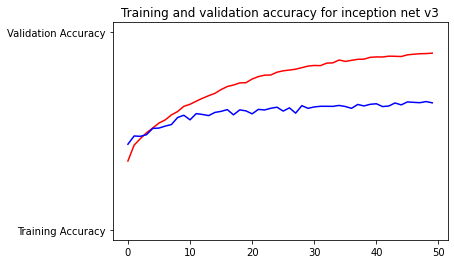

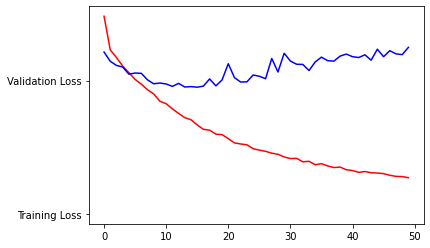

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy for inception net v3')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
def download_history():
  import pickle
  from google.colab import files

  with open('inception net v3.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('inception net v3.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>